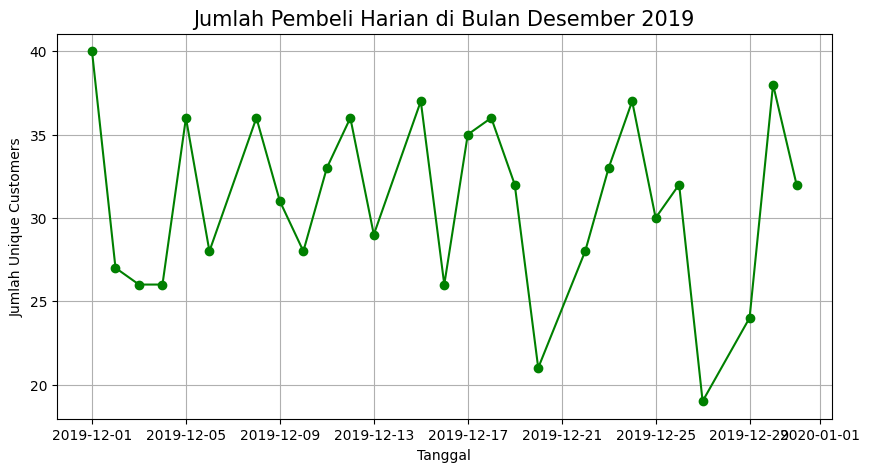

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv("retail_raw_reduced.csv")

# Mengubah kolom order_date menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Memfilter data hanya untuk bulan Desember
data_desember = data[(data['order_date'].dt.month == 12)]

# Menghitung jumlah unique customers di setiap tanggal
jumlah_customers = data_desember.groupby('order_date')['customer_id'].nunique()

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat line chart
plt.plot(jumlah_customers.index, jumlah_customers.values, marker='o', linestyle='-', color='g')

# Memberikan judul dan label sumbu
plt.title('Jumlah Pembeli Harian di Bulan Desember 2019', fontsize="15")
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Unique Customers')

# Menampilkan grid
plt.grid(True)

# Menampilkan line chart
plt.show()


In [22]:
#Case 1

import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv("retail_raw_reduced.csv")

# Mengubah kolom order_date menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Memfilter data hanya untuk bulan Desember
data_desember = data[(data['order_date'].dt.month == 12)]

# Menghitung total quantity untuk setiap brand
brand_quantity = data_desember.groupby('brand')['quantity'].sum()

# Mengurutkan brand berdasarkan total quantity secara descending
top5_brands = brand_quantity.nlargest(5)

# Memfilter data hanya untuk top 5 brand
dataset_top5brand_dec = data_desember[data_desember['brand'].isin(top5_brands.index)]

# Menampilkan top 5 brands
print("Top 5 brands dengan jumlah penjualan terbanyak pada Desember 2019:")
print(top5_brands.index.tolist())


Top 5 brands dengan jumlah penjualan terbanyak pada Desember 2019:
['BRAND_S', 'BRAND_P', 'BRAND_R', 'BRAND_C', 'BRAND_A']


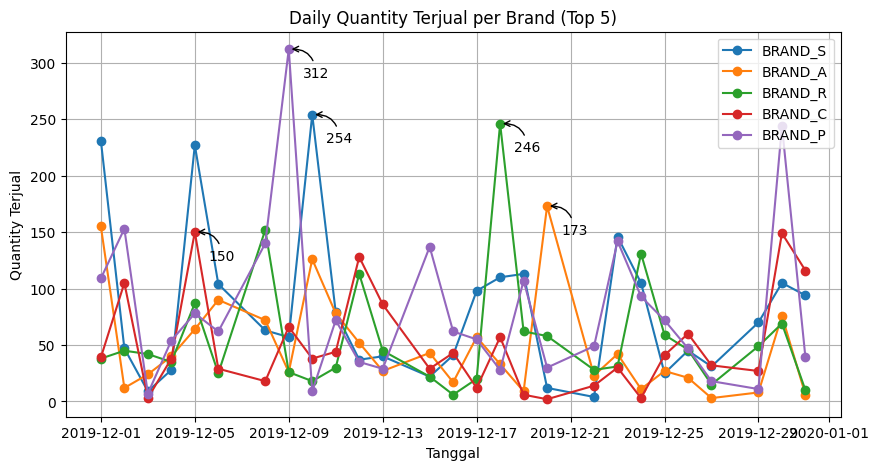

In [20]:
#Case 2

import pandas as pd
import matplotlib.pyplot as plt

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Loop melalui setiap brand pada dataset top 5 brand
for brand in dataset_top5brand_dec['brand'].unique():
    # Memfilter data untuk brand tertentu
    brand_data = dataset_top5brand_dec[dataset_top5brand_dec['brand'] == brand]

    # Menghitung jumlah quantity terjual per tanggal
    quantity_per_date = brand_data.groupby('order_date')['quantity'].sum()

    # Membuat line chart untuk brand tertentu
    plt.plot(quantity_per_date.index, quantity_per_date.values, marker='o', linestyle='-', label=brand)

    # Mencari tanggal dengan quantity tertinggi (lonjakan)
    max_quantity_date = quantity_per_date.idxmax()
    max_quantity = quantity_per_date.max()

    # Menandai titik lonjakan pada chart
    plt.annotate(f'{max_quantity}', xy=(max_quantity_date, max_quantity), xytext=(10, -20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'))

# Memberikan judul dan label sumbu
plt.title('Daily Quantity Terjual per Brand (Top 5)')
plt.xlabel('Tanggal')
plt.ylabel('Quantity Terjual')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan multi-line chart
plt.show()


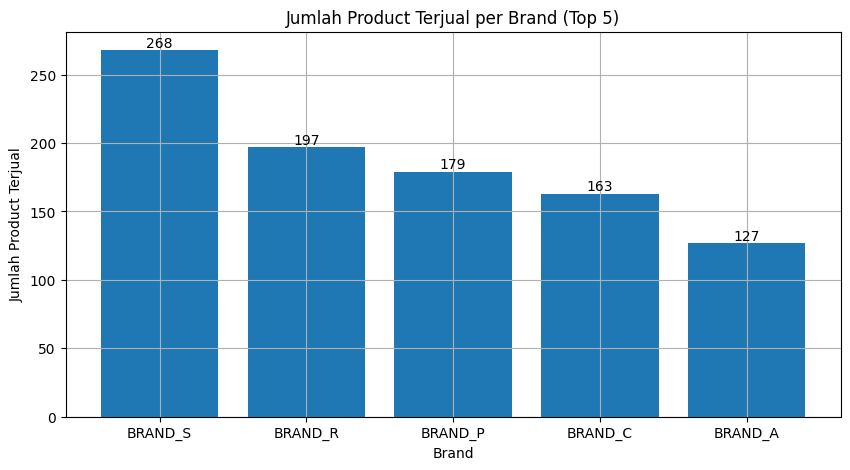

In [23]:
#Case 3

import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah product terjual untuk setiap brand
product_count = dataset_top5brand_dec.groupby('brand')['product_id'].count()

# Mengurutkan brand berdasarkan jumlah product terjual secara descending
sorted_brands = product_count.sort_values(ascending=False)

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat bar chart
plt.bar(sorted_brands.index, sorted_brands.values)

# Memberikan judul dan label sumbu
plt.title('Jumlah Product Terjual per Brand (Top 5)')
plt.xlabel('Brand')
plt.ylabel('Jumlah Product Terjual')

# Menampilkan label jumlah product di atas setiap bar
for i, value in enumerate(sorted_brands.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Menampilkan grid
plt.grid(True)

# Menampilkan bar chart
plt.show()


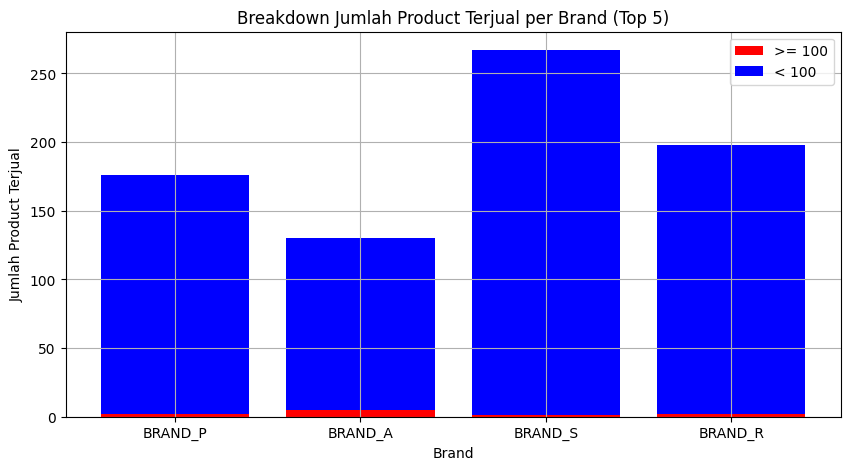

In [31]:
#Case 4

import pandas as pd
import matplotlib.pyplot as plt

# Memfilter data product dengan jumlah terjual >= 100
above_100 = dataset_top5brand_dec[dataset_top5brand_dec['quantity'] >= 100]

# Memfilter data product dengan jumlah terjual < 100
below_100 = dataset_top5brand_dec[dataset_top5brand_dec['quantity'] < 100]

# Menghitung jumlah product terjual >= 100 untuk setiap brand
above_100_count = above_100.groupby('brand')['quantity'].count()

# Menghitung jumlah product terjual < 100 untuk setiap brand
below_100_count = below_100.groupby('brand')['quantity'].count()

# Mengurutkan brand berdasarkan jumlah product terjual >= 100 secara descending
sorted_brands = above_100_count.sort_values(ascending=False)

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat stacked chart
plt.bar(sorted_brands.index, above_100_count, label='>= 100', color="r")
plt.bar(sorted_brands.index, below_100_count.reindex(sorted_brands.index, fill_value=0), bottom=above_100_count, label='< 100', color='b')

# Memberikan judul dan label sumbu
plt.title('Breakdown Jumlah Product Terjual per Brand (Top 5)')
plt.xlabel('Brand')
plt.ylabel('Jumlah Product Terjual')

# Menampilkan legend
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan stacked chart
plt.show()


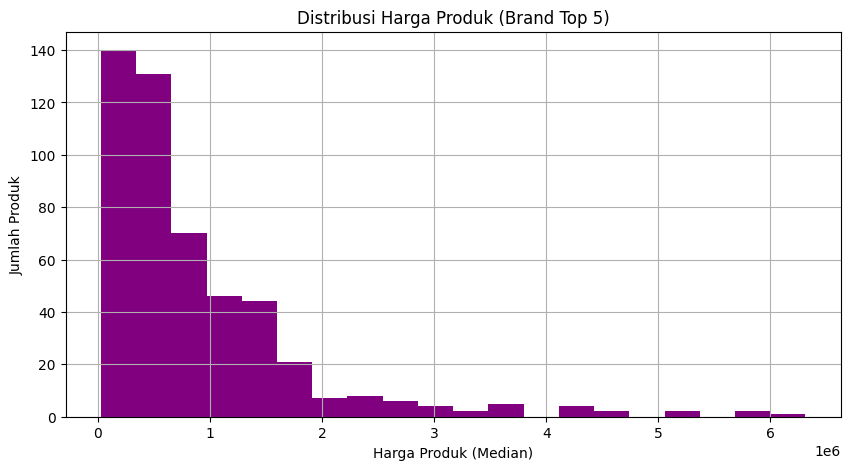

In [35]:
#Case 5

import pandas as pd
import matplotlib.pyplot as plt

# Memfilter data produk hanya untuk brand top 5
top5_brands = dataset_top5brand_dec['brand'].value_counts().nlargest(5).index
filtered_data = dataset_top5brand_dec[dataset_top5brand_dec['brand'].isin(top5_brands)]

# Mengambil harga median untuk setiap produk_id
median_prices = filtered_data.groupby('product_id')['item_price'].median()

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat histogram
plt.hist(median_prices, bins=20, color='purple')

# Memberikan judul dan label sumbu
plt.title('Distribusi Harga Produk (Brand Top 5)')
plt.xlabel('Harga Produk (Median)')
plt.ylabel('Jumlah Produk')

# Menampilkan grid
plt.grid(True)

# Menampilkan histogram
plt.show()


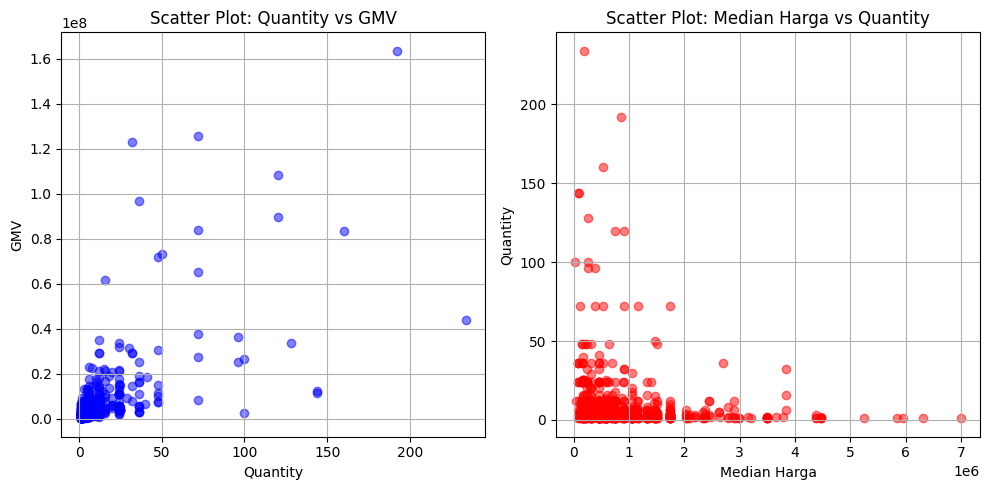

In [47]:
#Case 6a, 6b

import pandas as pd
import matplotlib.pyplot as plt

# Mengambil data product_id, quantity, dan item_price
data = dataset_top5brand_dec[['product_id', 'quantity', 'item_price']].drop_duplicates()

# Menghitung GMV berdasarkan item_price dan quantity
data['GMV'] = data['item_price'] * data['quantity']

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Scatter plot antara quantity dan GMV
plt.subplot(1, 2, 1)
plt.scatter(data['quantity'], data['GMV'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.grid(True)

# Scatter plot antara median harga dan quantity
plt.subplot(1, 2, 2)
plt.scatter(data['item_price'], data['quantity'], color='red', alpha=0.5)
plt.title('Scatter Plot: Median Harga vs Quantity')
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.grid(True)

# Menampilkan scatter plot
plt.tight_layout()
plt.show()
